# 책과 코드 읽기: 파이썬 머신러닝 완벽가이드 
 - Ch.6 사이킷런으로 수행하는 타이타닉 생존자 예측(p131~ 146)
 - 타이타닉 탑승자 데이터를 기반으로 생존자 예측하기
 - 목표: 예측 정확도 82%

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 500) # row 한번에 여러개 보기
pd.set_option('display.max_columns', 100) # 컬럼 한번에 여러개 보기

In [2]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

## LOAD DATA SET (step.01)

In [3]:
train = pd.read_csv("C:/Users/User/Downloads/data/titanic/train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("C:/Users/User/Downloads/data/titanic/test.csv")
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## DATA INFO FIND NULL DATA (step.02)

In [5]:
# DATA INFO
train.info()
# 'Survived' 컬럼을 통해 탑승자의 생사여부를 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# FIND NULL DATA
train.isnull().sum()
# 'Age', 'Cabin', 'Embarked' 컬럼에 결손값이 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()
# 'Age', 'Fare', 'Cabin' 컬럼에 결손값이 있다.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Explore (step.03)

#### 1. SEX

<AxesSubplot:xlabel='Sex', ylabel='count'>

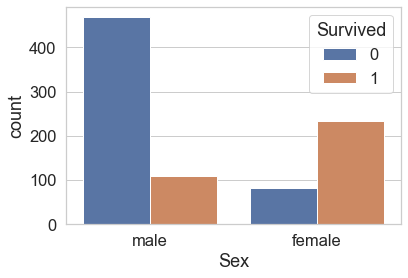

In [9]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

In [10]:
pd.pivot_table(data= train, 
               index = 'Sex', 
               values = 'Survived', 
               aggfunc = [np.mean, np.sum])
# train 데이터 셋에서 여성의 74% (233명), 남성의 18%(109명)이 생존했습니다.

,mean,sum
,Survived,Survived
Sex,,
female,0.742038,233
male,0.188908,109


#### 2. Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

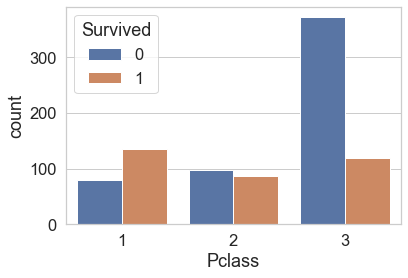

In [11]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

In [12]:
pd.pivot_table(data = train, 
               index = 'Pclass', 
               values = 'Survived', 
               aggfunc = [np.mean, np.sum])
# train 데이터 셋에서 Pclass 1의 62% (136명), 2의 47%(87명), 3의 24%(119명)이 생존했습니다.

,mean,sum
,Survived,Survived
Pclass,,
1,0.629630,136
2,0.472826,87
3,0.242363,119


#### 3. Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

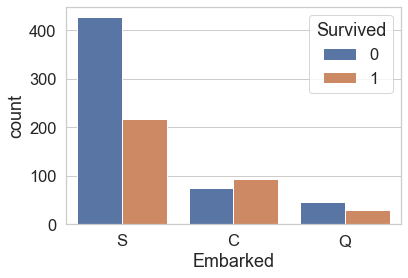

In [13]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

In [14]:
pd.pivot_table(data = train, 
               index = 'Embarked', 
               values = "Survived", 
               aggfunc =[np.sum, np.mean])
# train 데이터 셋에서 Embarked C의 55% (93명), Q의 38%(30명), S의 33%(217명)이 생존했습니다.

,sum,mean
,Survived,Survived
Embarked,,
C,93,0.553571
Q,30,0.389610
S,217,0.336957


#### 4. Age&Fare

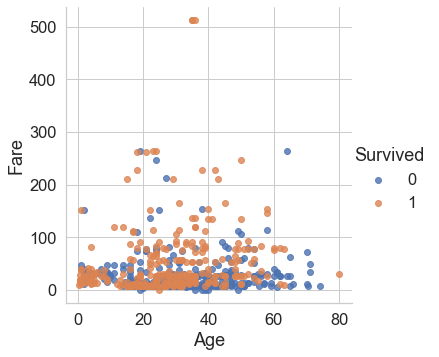

In [15]:
sns.lmplot(data = train, 
           x = "Age", 
           y = "Fare", 
           hue = 'Survived', 
           fit_reg = False)
# Fare 가 500 이상인 특잇값(outliers)이 존재합니다.

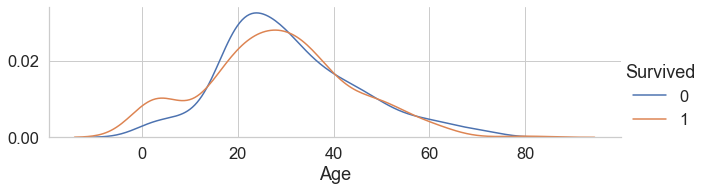

In [16]:
fa = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
fa.map(sns.kdeplot, 'Age')
fa.add_legend()
# 정규분포 모양을 보이지만, 어린이들의 생존율이 높습니다.

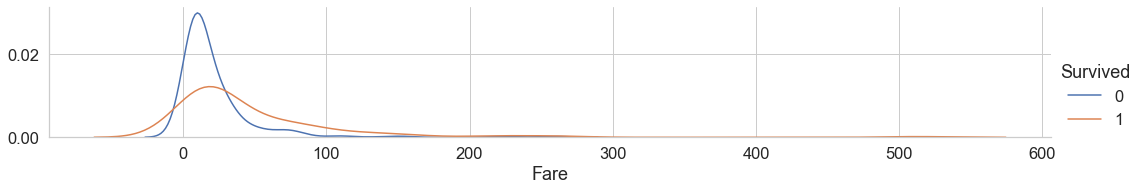

In [17]:
fa = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fa.map(sns.kdeplot, 'Fare')
fa.add_legend()

#### 5. SibSp & Parch

In [18]:
train['Family_size'] = train['SibSp'] + train["Parch"] + 1
print(train.shape)
train[['SibSp', 'Parch', 'Family_size']].head()
# 함께 탄 가족의 숫자 컬럼을 새로 만듭니다.
# 직계 가족만 포함되기에, 친적들과 같이 탑승한 경우는 확인이 어렵습니다.

(891, 13)


,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


<AxesSubplot:xlabel='Family_size', ylabel='count'>

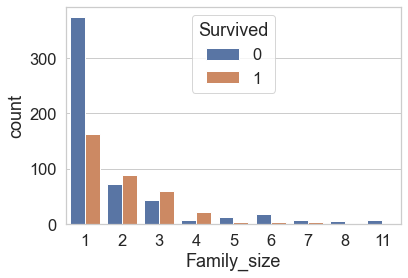

In [19]:
sns.countplot(data = train, x = 'Family_size', hue = "Survived")

In [20]:
pd.pivot_table(data = train, 
               index = "Family_size", 
               values = 'Survived', 
               aggfunc = [np.mean, np.sum])
# 1인, 5인 이상 가족의 생존율이 낮습니다. 2인 이상 4인 이하 가족의 생존율이 높습니다.

,mean,sum
,Survived,Survived
Family_size,,
1,0.303538,163
2,0.552795,89
3,0.578431,59
4,0.724138,21
5,0.200000,3
6,0.136364,3
7,0.333333,4
8,0.000000,0


#### 6. Name

In [21]:
#train['Title'] = train['Name'].str.split(',')
train['Title'] = train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
print(train.shape)
train[["Name", "Title"]].head()
# 이름에 들어간 Mr, Mrs 등으로 결혼 여부, 사회적 지위 등을 알 수 있습니다.

(891, 14)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

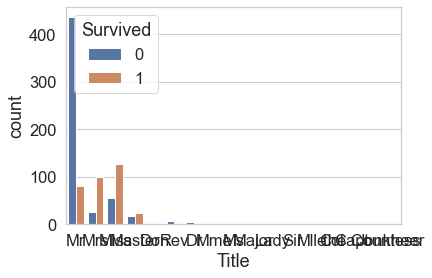

In [22]:
sns.countplot(data = train, x = 'Title', hue = 'Survived')

In [23]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Ms                1
Sir               1
the Countess      1
Jonkheer          1
Mme               1
Capt              1
Lady              1
Name: Title, dtype: int64

In [24]:
pd.pivot_table(data = train, 
               index = 'Title', 
               values = 'Survived', 
               aggfunc = ['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Title,,,
Capt,0.000000,0,1
Col,0.500000,1,2
Don,0.000000,0,1
Dr,0.428571,3,7
Jonkheer,0.000000,0,1
Lady,1.000000,1,1
Major,0.500000,1,2
Master,0.575000,23,40


# 가설 검증 1차 (4.12)

- 1. Age에 결손값이 있으면 생존율이 낮을 것이다.
- 2. 선실 등급 & 성별에 따라 생존율 차이가 있을 것이다.

#### 가설 검증 1차 (4.12) : 1. Age에 결손값이 있으면 생존율이 낮을 것이다 -> True

In [25]:
train['Age_null'] = pd.isna(train['Age'])
print(train.shape)
train[['Age_null', 'Age']].head()

(891, 15)


,Age_null,Age
0,False,22.0
1,False,38.0
2,False,26.0
3,False,35.0
4,False,35.0


<AxesSubplot:xlabel='Age_null', ylabel='count'>

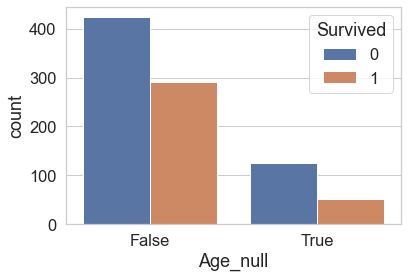

In [26]:
sns.countplot(data = train, x = 'Age_null', hue = "Survived")

In [27]:
pd.pivot_table(data = train, 
               index = ["Age_null"], 
               values = 'Survived', 
               aggfunc = [np.mean, np.sum])
# Age에 결손값이 있는 경우 생존율이 29% 입니다.

,mean,sum
,Survived,Survived
Age_null,,
False,0.406162,290
True,0.293785,52


In [28]:
pd.pivot_table(data = train, 
               index = ["Sex", "Pclass", "Age_null"], 
               values = 'Survived', 
               aggfunc = [np.mean, np.sum])
# 여성의 경우 나이에 결손값과 여부가 생존에 큰 영향을 미치지 않지만, 3등석 남성의 경우..

mean      sum
                        Survived Survived
Sex    Pclass Age_null                   
female 1      False     0.964706       82
              True      1.000000        9
       2      False     0.918919       68
              True      1.000000        2
       3      False     0.460784       47
              True      0.595238       25
male   1      False     0.396040       40
              True      0.238095        5
       2      False     0.151515       15
              True      0.222222        2
       3      False     0.150198       38
              True      0.095745        9

#### 가설 검증 1차 (4.12) : 2. 선실 등급 & 성별에 따라 생존율 차이가 있을 것이다. -> True

In [29]:
pd.pivot_table(data = train, 
               index = ['Sex', 'Pclass'], 
               values = 'Survived', 
               aggfunc = [np.sum, np.mean])
# 3등석의 여성의 경우 생존률이 50% 입니다. 1등석의 남성의 경우 생존율이 36% 입니다.

sum      mean
              Survived  Survived
Sex    Pclass                   
female 1            91  0.968085
       2            70  0.921053
       3            72  0.500000
male   1            45  0.368852
       2            17  0.157407
       3            47  0.135447

In [30]:
# 사망한 3등석 여성의 경우 어떤 특징을?

In [31]:
pclass3_female = train[(train['Sex'] == 'female') & (train['Pclass'] == 3)]
pd.pivot_table(data = pclass3_female, 
               index = ["Embarked", 'Family_size'], 
               values = 'Survived', 
               aggfunc = [np.mean, np.sum])
# Embarked 'S'에서 탑승한 3등석 여성 승객의 경우 생존률이 낮다

mean      sum
                      Survived Survived
Embarked Family_size                   
C        1            0.800000        4
         2            0.375000        3
         3            0.666667        4
         4            1.000000        4
Q        1            0.760000       19
         2            1.000000        4
         3            0.333333        1
         6            0.000000        0
S        1            0.466667       14
         2            0.470588        8
         3            0.538462        7
         4            0.500000        1
         5            0.000000        0
         6            0.000000        0
         7            0.375000        3
         8            0.000000        0
         11           0.000000        0

# 가설 검증 2차 (4.14)

- 1. Pcalss에서 Fare에 따라 생존률이 다를 것이다.
- 2. Age에 따라 생존률이 다를 것이다.

In [32]:
pd.pivot_table(data = train, 
               index = ['Sex', 'Pclass'], 
               values = 'Survived', 
               aggfunc = [np.sum, np.mean, 'count'])
# Sex에 따른 Pclass 별 평균 생존률  

sum      mean    count
              Survived  Survived Survived
Sex    Pclass                            
female 1            91  0.968085       94
       2            70  0.921053       76
       3            72  0.500000      144
male   1            45  0.368852      122
       2            17  0.157407      108
       3            47  0.135447      347

In [33]:
train['Fare'].value_counts()
# 티겟 가격이 248개로 나눠져 있다.

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
21.0000      6
27.9000      6
26.2500      6
27.7208      5
30.5000      5
73.5000      5
53.1000      5
15.2458      5
29.1250      5
34.3750      4
11.5000      4
21.0750      4
35.5000      4
12.4750      4
7.7333       4
110.8833     4
7.8792       4
227.5250     4
79.2000      4
31.3875      4
120.0000     4
27.7500      4
25.4667      4
7.5500       4
39.0000      4
263.0000     4
151.5500     4
15.8500      4
7.1250       4
13.5000      4
90.0000      4
19.2583      4
7.6500       4
23.0000      4
52.5542      3
29.7000      3
86.5000   

<AxesSubplot:xlabel='Fare', ylabel='count'>

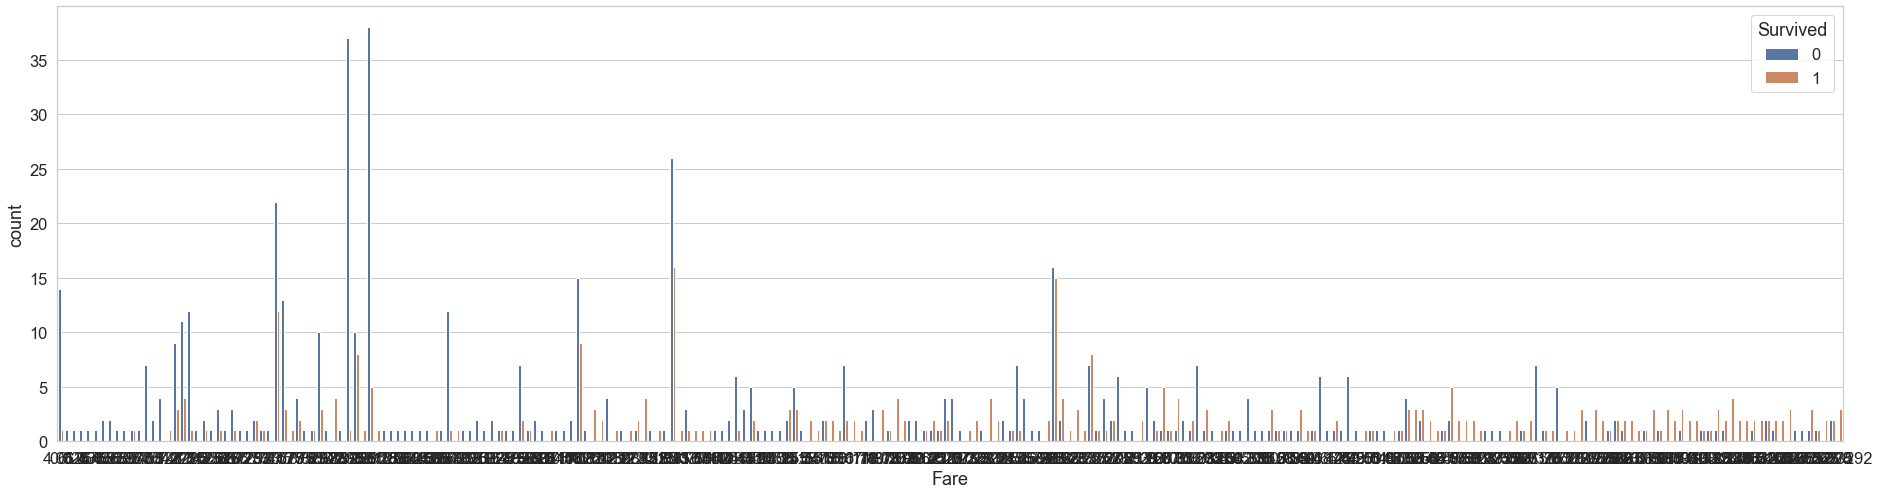

In [34]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(32, 8)
sns.countplot(data = train, x = 'Fare', hue = 'Survived', ax = ax1)

In [35]:
# 특정 Fare에 대해 유독 생존률이 낮다 왜 그럴까?

In [36]:
fare_pivot = pd.pivot_table(data = train, 
                            index = ['Pclass','Sex','Fare'], 
                            values = 'Survived', 
                            aggfunc = [np.sum, np.mean, 'count'])

fare_pivot.sort_values(by = ('mean', 'Survived'), ascending=False).sort_index()
# 같은 Pclass, Sex에도 특정 Fare에 따라 결정적으로 생존률이 나뉩니다. 
# 아마도 Fare에 따라 배정된 방이 다르고 방에 위치에 따라 생존률이 결정된 것으로 보입니다.

sum      mean    count
                       Survived  Survived Survived
Pclass Sex    Fare                                
1      female 25.9292         2  1.000000        2
              26.2833         1  1.000000        1
              26.5500         1  1.000000        1
              27.7208         1  1.000000        1
              28.7125         0  0.000000        1
              30.0000         1  1.000000        1
              31.0000         1  1.000000        1
              39.4000         1  1.000000        1
              39.6000         1  1.000000        1
              49.5000         1  1.000000        1
              49.5042         1  1.000000        1
              51.4792         1  1.000000        1
              51.8625         1  1.000000        1
              52.0000         2  1.000000        2
              52.5542         1  1.000000        1
              53.1000         2  1.000000        2
              55.0000         2  1.000000        2
              55.9000         1  1.000000        1
              56.9292         1  1.000000        1
              57.0000         1  1.000000        1
              57.9792         2  1.000000        2
              59.4000         1  1.000000        1
              66.6000         1  1.000000        1
              69.3000         2  1.000000        2
              71.0000         1  1.000000        1
              71.2833         1  1.000000        1
              75.2500         1  1.000000        1
              76.2917         1  1.000000        1
              76.7292         1  1.000000        1
              77.9583         3  1.000000        3
              78.2667         2  1.000000        2
              78.8500         1  1.000000        1
              79.2000         1  1.000000        1
              79.6500         2  1.000000        2
              80.0000         2  1.000000        2
              82.1708         1  1.000000        1
              83.1583         3  1.000000        3
              83.4750         1  1.000000        1
              86.5000         3  1.000000        3
              89.1042         1  1.000000        1
              90.0000         2  1.000000        2
              91.0792         1  1.000000        1
              93.5000         2  1.000000        2
              106.4250        1  1.000000        1
              108.9000        1  1.000000        1
              110.8833        2  1.000000        2
              113.2750        2  1.000000        2
              120.0000        2  1.000000        2
              133.6500        1  1.000000        1
              134.5000        2  1.000000        2
              135.6333        2  1.000000        2
              146.5208        2  1.000000        2
              151.5500        1  0.333333        3
              153.4625        2  1.000000        2
              164.8667        2  1.000000        2
              211.3375        3  1.000000        3
              227.5250        3  1.000000        3
              247.5208        1  1.000000        1
              262.3750        2  1.000000        2
              263.0000        2  1.000000        2
              512.3292        1  1.000000        1
       male   0.0000          0  0.000000        5
              5.0000          0  0.000000        1
              25.5875         0  0.000000        1
              25.9250         0  0.000000        1
              26.0000         0  0.000000        2
              26.2875         3  1.000000        3
              26.3875         1  1.000000        1
              26.5500         7  0.500000       14
              27.7208         0  0.000000        3
              27.7500         0  0.000000        1
              28.5000         0  0.000000        1
              29.7000         1  0.333333        3
              30.0000         3  0.750000        4
              30.5000         4  0.800000        5
              30.6958         0  0.000000        2

In [37]:
# Age에 따른 생존률
age_pivot = pd.pivot_table(data = train[train['Age_null'] == False], 
               index = ['Age'], 
               values = 'Survived', 
               aggfunc = [np.sum, np.mean, 'count'])

age_pivot.sort_values(by = ('mean', 'Survived'), ascending=False).sort_index()
# 대체적으로 6세 이하 승객들의 생존률이 높습니다.
# 2세 승객들은 어떤 이유에서 생존률이 낮을까요?

,sum,mean,count
,Survived,Survived,Survived
Age,,,
0.42,1,1.000000,1
0.67,1,1.000000,1
0.75,2,1.000000,2
0.83,2,1.000000,2
0.92,1,1.000000,1
1.00,5,0.714286,7
2.00,3,0.300000,10
3.00,5,0.833333,6


In [38]:
age_pivot = pd.pivot_table(data = train[train['Age_null'] == False], 
               index = ['Family_size','Age'], 
               values = 'Survived', 
               aggfunc = [np.sum, np.mean, 'count'])

age_pivot.sort_values(by = ('mean', 'Survived'), ascending=False).sort_index()
# 답은 가족 숫자였습니다. 4인 가족 이하 9세 이하 승객들의 생존률이 높습니다.

sum      mean    count
                  Survived  Survived Survived
Family_size Age                              
1           5.00         1  1.000000        1
            11.00        0  0.000000        1
            13.00        1  1.000000        1
            14.00        0  0.000000        1
            15.00        2  1.000000        2
            16.00        4  0.400000       10
            17.00        2  0.285714        7
            18.00        3  0.230769       13
            19.00        5  0.277778       18
            20.00        1  0.083333       12
            20.50        0  0.000000        1
            21.00        4  0.222222       18
            22.00        6  0.285714       21
            23.00        2  0.181818       11
            23.50        0  0.000000        1
            24.00        6  0.352941       17
            24.50        0  0.000000        1
            25.00        1  0.083333       12
            26.00        6  0.500000       12
            27.00        7  0.636364       11
            28.00        5  0.277778       18
            28.50        0  0.000000        2
            29.00        5  0.454545       11
            30.00        9  0.428571       21
            30.50        0  0.000000        2
            31.00        3  0.375000        8
            32.00        8  0.571429       14
            32.50        1  1.000000        1
            33.00        1  0.111111        9
            34.00        4  0.444444        9
            34.50        0  0.000000        1
            35.00        6  0.461538       13
            36.00        5  0.416667       12
            37.00        0  0.000000        1
            38.00        2  0.285714        7
            39.00        1  0.142857        7
            40.00        4  0.500000        8
            40.50        0  0.000000        1
            41.00        1  0.500000        2
            42.00        4  0.500000        8
            43.00        0  0.000000        2
            44.00        2  0.500000        4
            45.00        3  0.428571        7
            45.50        0  0.000000        2
            46.00        0  0.000000        2
            47.00        0  0.000000        7
            48.00        2  0.500000        4
            49.00        1  0.500000        2
            50.00        2  0.400000        5
            51.00        1  0.200000        5
            52.00        1  0.333333        3
            54.00        0  0.000000        3
            55.00        1  0.500000        2
            55.50        0  0.000000        1
            56.00        1  0.333333        3
            57.00        0  0.000000        2
            58.00        2  0.666667        3
            59.00        0  0.000000        2
            60.00        0  0.000000        1
            61.00        0  0.000000        3
            62.00        2  0.500000        4
            63.00        1  1.000000        1
            64.00        0  0.000000        1
            65.00        0  0.000000        2
            66.00        0  0.000000        1
            70.00        0  0.000000        1
            70.50        0  0.000000        1
            71.00        0  0.000000        2
            74.00        0  0.000000        1
            80.00        1  1.000000        1
2           0.42         1  1.000000        1
            2.00         1  0.500000        2
            4.00         1  1.000000        1
            6.00         2  1.000000        2
            12.00        1  1.000000        1
            13.00        1  1.000000        1
            14.00        2  1.000000        2
            14.50        0  0.000000        1
            15.00        2  1.000000        2
            16.00        2  1.000000        2
            17.00        2  0.666667        3
            18.00        3  0.428571        7
            19.00        3  0.750000        4
            20.00        1  0.500000        2
            21.00    

# 결론 및 전처리 계획:
1. null data: train 'Age' , test 'Fare'
2. 'Family_size' 1 = 'small'  / 2~4 = 'middel' / 5 ~ 'big' one hot encoding
3. 'Name' - Master T/F
4. 'small_family_baby' = 'Age' + 'Family_size' under 9 & 'small' T/F

5. lable encoding
6. one hot encoding

7. 'Fare' = good_ticket / bad_ticket

## Preprocessing

#### 1. null data

In [39]:
# train 'Age'
train["Age_fillin"] = train["Age"]
train.loc[train['Age'].isnull(), 'Age_fillin'] = train['Age'].mean()
train.loc[train['Age'].isnull(), ['Age', 'Age_fillin']].head()

,Age,Age_fillin
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118


In [40]:
# test 'Age'
test["Age_fillin"] = test["Age"]
test.loc[test['Age'].isnull(), 'Age_fillin'] = test['Age'].mean()
test.loc[test['Age'].isnull(), ['Age', 'Age_fillin']].head()

,Age,Age_fillin
10,NaN,30.27259
22,NaN,30.27259
29,NaN,30.27259
33,NaN,30.27259
36,NaN,30.27259


In [41]:
# train 'Fare'
train["Fare_fillin"] = train["Fare"]
train.loc[train['Fare'].isnull(), 'Fare_fillin'] = train['Fare'].mean()
train.loc[train['Fare'].isnull(), ['Fare', 'Fare_fillin']].head()

,Fare,Fare_fillin


In [42]:
# test 'Fare'
test["Fare_fillin"] = test["Fare"]
test.loc[test['Fare'].isnull(), 'Fare_fillin'] = test['Fare'].mean()
test.loc[test['Fare'].isnull(), ['Fare', 'Fare_fillin']].head()

,Fare,Fare_fillin
152,NaN,35.627188


#### 2. Family size

In [43]:
train["Family_size"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)
train[["SibSp", "Parch", "Family_size"]].head()

(891, 17)


,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [44]:
test["Family_size"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "Family_size"]].head()

(418, 14)


,SibSp,Parch,Family_size
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [45]:
train.loc[train['Family_size'] == 1, 'Family_size_name'] = 'single'
train.loc[(train['Family_size'] > 1) & (train['Family_size'] < 5), 'Family_size_name'] = 'small'
train.loc[train['Family_size'] > 4, 'Family_size_name'] = 'big'

train[['Family_size', 'Family_size_name']].head()

,Family_size,Family_size_name
0,2,small
1,2,small
2,1,single
3,2,small
4,1,single


In [46]:
test.loc[test['Family_size'] == 1, 'Family_size_name'] = 'single'
test.loc[(test['Family_size'] > 1) & (test['Family_size'] < 5), 'Family_size_name'] = 'small'
test.loc[test['Family_size'] > 4, 'Family_size_name'] = 'big'

test[['Family_size', 'Family_size_name']].head()

,Family_size,Family_size_name
0,1,single
1,2,small
2,1,single
3,1,single
4,3,small


In [47]:
one_got_train_Family_size_name = pd.get_dummies(train['Family_size_name'], prefix = 'Family_size_name')
one_got_train_Family_size_name.head()

,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [48]:
one_got_test_Family_size_name = pd.get_dummies(test['Family_size_name'], prefix = 'Family_size_name')
one_got_test_Family_size_name.head()

,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


#### 3.Name

In [49]:
train['Title'] = train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

print(train.shape)
train[['Name', 'Title']].head()

(891, 18)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [50]:
test['Title'] = test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

print(test.shape)
test[['Name', 'Title']].head()

(418, 16)


,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [51]:
train["Master"] = train["Title"].str.contains("Master")
print(train.shape)
train[['Master', 'Name']].head()

(891, 19)


,Master,Name
0,False,"Braund, Mr. Owen Harris"
1,False,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,False,"Heikkinen, Miss. Laina"
3,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,False,"Allen, Mr. William Henry"


In [52]:
test["Master"] = test["Title"].str.contains("Master")
print(test.shape)
test[['Master', 'Name']].head()

(418, 17)


,Master,Name
0,False,"Kelly, Mr. James"
1,False,"Wilkes, Mrs. James (Ellen Needs)"
2,False,"Myles, Mr. Thomas Francis"
3,False,"Wirz, Mr. Albert"
4,False,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


#### 4. small_family_baby

In [53]:
train['small_family_baby'] = (train['Family_size'] == 'small') & (train['Age_fillin'] > 10)
train[['small_family_baby', 'Family_size','Age_fillin']].head()

,small_family_baby,Family_size,Age_fillin
0,False,2,22.0
1,False,2,38.0
2,False,1,26.0
3,False,2,35.0
4,False,1,35.0


In [54]:
test['small_family_baby'] = (test['Family_size'] == 'small') & (test['Age_fillin'] > 10)
test[['small_family_baby', 'Family_size','Age_fillin']].head()

,small_family_baby,Family_size,Age_fillin
0,False,1,34.5
1,False,2,47.0
2,False,1,62.0
3,False,1,27.0
4,False,3,22.0


#### 5. Pclass

In [55]:
one_got_train_Pclass = pd.get_dummies(train['Pclass'], prefix = 'Pclass')
print(one_got_train_Pclass.shape)
one_got_train_Pclass.head()

(891, 3)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [56]:
one_got_test_Pclass = pd.get_dummies(test['Pclass'], prefix = 'Pclass')
print(one_got_test_Pclass.shape)
one_got_test_Pclass.head()

(418, 3)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


#### 6. Ticket

In [58]:
# pclass, sex에 따른 평균 생존률 구하기
# 2명 이상 소지한 티켓의 평균 생존률 대비 높은지 낮은지 확인

def find_good_ticket(row):
    

(891, 20)


In [61]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title,Age_null,Age_fillin,Fare_fillin,Family_size_name,Master,small_family_baby
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,False,22.0,7.2500,small,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,False,38.0,71.2833,small,False,False


In [65]:
train[(train['Pclass'] == 1) & (train['Sex'] == 'female')]['Survived'].mean()

0.9680851063829787

In [70]:
train[(train['Pclass'] == 1) & (train['Sex'] == 'female')]['Fare'].value_counts() > 1

77.9583      True
227.5250     True
151.5500     True
86.5000      True
211.3375     True
83.1583      True
57.9792      True
53.1000      True
69.3000      True
79.6500      True
93.5000      True
90.0000      True
120.0000     True
25.9292      True
52.0000      True
153.4625     True
134.5000     True
55.0000      True
263.0000     True
78.2667      True
80.0000      True
110.8833     True
135.6333     True
146.5208     True
113.2750     True
164.8667     True
262.3750     True
39.4000     False
49.5042     False
57.0000     False
71.0000     False
49.5000     False
108.9000    False
51.8625     False
31.0000     False
51.4792     False
75.2500     False
39.6000     False
512.3292    False
89.1042     False
133.6500    False
30.0000     False
247.5208    False
82.1708     False
79.2000     False
76.7292     False
56.9292     False
55.9000     False
76.2917     False
27.7208     False
26.5500     False
106.4250    False
78.8500     False
26.2833     False
59.4000     False
66.6000   

#### 7. Concat

In [57]:
train_concat = pd.concat([train,one_got_train_Pclass, one_got_train_Family_size_name], axis = 1)
print(train_concat.shape)
train_concat.head()

(891, 26)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title,Age_null,Age_fillin,Fare_fillin,Family_size_name,Master,small_family_baby,Pclass_1,Pclass_2,Pclass_3,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,False,22.0,7.2500,small,False,False,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,False,38.0,71.2833,small,False,False,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,False,26.0,7.9250,single,False,False,0,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,False,35.0,53.1000,small,False,False,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,False,35.0,8.0500,single,False,False,0,0,1,0,1,0


In [58]:
test_concat = pd.concat([test,one_got_test_Pclass, one_got_test_Family_size_name], axis = 1)
print(test_concat.shape)
test_concat.head()

(418, 24)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillin,Fare_fillin,Family_size,Family_size_name,Title,Master,small_family_baby,Pclass_1,Pclass_2,Pclass_3,Family_size_name_big,Family_size_name_single,Family_size_name_small
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,7.8292,1,single,Mr,False,False,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,7.0000,2,small,Mrs,False,False,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,9.6875,1,single,Mr,False,False,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,8.6625,1,single,Mr,False,False,0,0,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,12.2875,3,small,Mrs,False,False,0,0,1,0,0,1


## Feature engineering

In [59]:
train_concat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Title',
       'Age_null', 'Age_fillin', 'Fare_fillin', 'Family_size_name', 'Master',
       'small_family_baby', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Family_size_name_big', 'Family_size_name_single',
       'Family_size_name_small'],
      dtype='object')

In [60]:
feature_names = ["Sex",  
                 'small_family_baby', 
                 'Family_size_name_big',
                 'Family_size_name_single', 
                 'Family_size_name_small',
                 'Pclass_1',
                 'Pclass_2', 
                 'Pclass_3',
                 "Master", ]

feature_names

['Sex',
 'small_family_baby',
 'Family_size_name_big',
 'Family_size_name_single',
 'Family_size_name_small',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Master']

In [61]:
df = train_concat.copy()
df['target'] = df['Survived']
print(df.shape)

(891, 27)


In [62]:
label_name = "target"
label_name

'target'

In [63]:
train_feature_names = train_concat[feature_names]
test_feature_names = test_concat[feature_names]

In [64]:
dtypes_train = train_feature_names.dtypes
encoders = {}
for column in train_feature_names.columns:
    if str(dtypes_train[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(train_feature_names[column])
        encoders[column] = encoder
        
df_train = train_feature_names.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_train[column] = encoder.transform(train_feature_names[column])

print(df_train.shape)
df_train.head()

(891, 9)


,Sex,small_family_baby,Family_size_name_big,Family_size_name_single,Family_size_name_small,Pclass_1,Pclass_2,Pclass_3,Master
0,1,False,0,0,1,0,0,1,False
1,0,False,0,0,1,1,0,0,False
2,0,False,0,1,0,0,0,1,False
3,0,False,0,0,1,1,0,0,False
4,1,False,0,1,0,0,0,1,False


In [65]:
dtypes_test = test_feature_names.dtypes
encoders = {}
for column in test_feature_names.columns:
    if str(dtypes_test[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(test_feature_names[column])
        encoders[column] = encoder
        
df_test = test_feature_names.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_test[column] = encoder.transform(test_feature_names[column])

print(df_test.shape)
df_test.head()

(418, 9)


,Sex,small_family_baby,Family_size_name_big,Family_size_name_single,Family_size_name_small,Pclass_1,Pclass_2,Pclass_3,Master
0,1,False,0,1,0,0,0,1,False
1,0,False,0,0,1,0,0,1,False
2,1,False,0,1,0,0,1,0,False
3,1,False,0,1,0,0,0,1,False
4,0,False,0,0,1,0,0,1,False


In [ ]:
X_train = df_train.copy()
print(X_train.shape)
X_train.head()

In [ ]:
X_test = df_test.copy()
print(X_test.shape)
X_test.head()

In [ ]:
y_train = df[label_name]
print(y_train.shape)
y_train.head()

## Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

In [ ]:
submission = pd.read_csv("C:/Users/User/Downloads/data/titanic/gender_submission.csv", index_col="PassengerId")
print(submission.shape)
submission.head()

In [ ]:
submission["Survived"] = predictions

print(submission.shape)
submission.head()

In [ ]:
submission.to_csv("C:/Users/User/Downloads/data/titanic/20210418_gender_submission.csv")

In [82]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

# 기타 라이브러리
import random
import gc
import os


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}


# 2. 클래스로 만들어 보기

class AutoML:
    
    def __init__(self, data, target,test_size, model):
        
        # 모델 리스트
        models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}
        
        self.data = data
        self.target = target
        self.test_size = test_size
        self.model = models_list[model]
        self.results = dict()
        
        # Feature, target 나누기
        X = self.data
        Y = self.target
        
        # train, test 데이터 나누기
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X,
                                                           Y,
                                                           test_size = self.test_size,
                                                           random_state = 31)
    
    def fit(self):
        self.fit = self.model.fit(self.X_train, self.y_train)
        
    def predict(self):
        self.predict = self.model.predict(self.X_test)
        
    def show(self):
        print('accuracy_score:',accuracy_score(self.y_test, self.predict))
        
    def kfold(self, nfold):
        self.nfold = nfold
        folds = KFold(n_splits = nfold)
        splits = folds.split(self.X_train, self.y_train)
        columns = self.X_train.columns
        y_preds = np.zeros(self.X_test.shape[0])
        y_oof = np.zeros(self.X_train.shape[0])
        score = 0
        
        
        for fold_n, (trn_idx, val_idx)in enumerate(splits):
            X_trn, X_val = self.X_train[columns].iloc[trn_idx], self.X_train[columns].iloc[val_idx]
            y_trn, y_val = self.y_train.iloc[trn_idx], self.y_train.iloc[val_idx]
            
            self.model.fit(self.X_train, self.y_train)
            
            y_pred_val = self.model.predict(X_val)
            y_pred_val = [int(v >= 0.5) for v in y_pred_val]
            y_oof[val_idx] = y_pred_val
            
            print(f"Fold {fold_n + 1} | F1 Score: {f1_score(y_val, y_pred_val, average='weighted')}")
    
            score += f1_score(y_val, y_pred_val, average='weighted') / self.nfold
            y_preds += self.model.predict(self.X_test) / self.nfold
    
            del X_trn, X_val, y_trn, y_val
            gc.collect()
            
        print(f"\nMean F1 score = {score}")
        
        
    def Coarse_Finer_Search(self):
        n_estimators = 300
        num_epoch = 100
        coarse_hyperparameters_list = []

        for epoch in range(num_epoch):
            max_depth = np.random.randint(low=2, high=100)
            max_features = np.random.uniform(low=0.1, high=1.0)
            min_samples_split = np.random.randint(low=2, high=50)
            min_samples_leaf = np.random.randint(low=1, high=50)
            

            model = RandomForestClassifier(n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           max_features=max_features,
                                           min_samples_split = min_samples_split,
                                           min_samples_leaf = min_samples_leaf,
                                           n_jobs=-1,
                                           random_state=37)
            
            score = cross_val_score(model, 
                                    self.data, self.target, 
                                    cv=20,
                                    scoring='f1_macro').mean()
    
            # hyperparameter 탐색 결과를 딕셔너리화 합니다.
            hyperparameters = {'epoch': epoch,
                               'score': score,
                               'n_estimators': n_estimators,
                               'max_depth': max_depth,
                               'max_features': max_features,
                               'min_samples_split': min_samples_split,
                               'min_samples_leaf': min_samples_leaf
                              }

            # hyperparameter 탐색 결과를 리스트에 저장합니다.
            coarse_hyperparameters_list.append(hyperparameters)

            # hyperparameter 탐색 결과를 출력합니다.
            print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, min_samples_split = {min_samples_split:2},min_samples_leaf = {min_samples_leaf:2},Score = {score:.5f}")

        # coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
        coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

        # 변환한 coarse_hyperparameters_list를 score가 높은 순으로 정렬합니다.
        coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score", ascending = True)

        # coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
        print(coarse_hyperparameters_list.shape)

        # coarse_hyperparameters_list의 상위 10개를 출력합니다.
        coarse_hyperparameters_list.head(10)

In [83]:
test = AutoML(df_train, df.target, 0.3, 'RandomForestClassifier')

In [84]:
test.fit()
test.predict()
test.show()

accuracy_score: 0.7947761194029851


In [85]:
test.kfold(5)

Fold 1 | F1 Score: 0.8698826466916355
Fold 2 | F1 Score: 0.8118397217205165
Fold 3 | F1 Score: 0.8748663101604277
Fold 4 | F1 Score: 0.7847134943909139
Fold 5 | F1 Score: 0.8320910720104269

Mean F1 score = 0.8346786489947842


In [86]:
test.Coarse_Finer_Search()

 0 n_estimators = 300, max_depth = 55, max_features = 0.963201, min_samples_split =  7,min_samples_leaf = 14,Score = 0.80335
 1 n_estimators = 300, max_depth = 40, max_features = 0.462631, min_samples_split = 39,min_samples_leaf =  3,Score = 0.82054
 2 n_estimators = 300, max_depth = 75, max_features = 0.549747, min_samples_split = 14,min_samples_leaf =  9,Score = 0.82054
 3 n_estimators = 300, max_depth = 55, max_features = 0.377336, min_samples_split = 34,min_samples_leaf = 17,Score = 0.78205
 4 n_estimators = 300, max_depth = 14, max_features = 0.998643, min_samples_split = 49,min_samples_leaf = 11,Score = 0.81434
 5 n_estimators = 300, max_depth = 68, max_features = 0.545109, min_samples_split =  4,min_samples_leaf = 25,Score = 0.77438
 6 n_estimators = 300, max_depth = 14, max_features = 0.784389, min_samples_split = 44,min_samples_leaf = 31,Score = 0.76687
 7 n_estimators = 300, max_depth = 23, max_features = 0.271126, min_samples_split = 17,min_samples_leaf = 27,Score = 0.78182


KeyboardInterrupt: 